In [42]:
import numpy as np
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import torch

# 0. Make Dataset

In [43]:
n_samples = 5000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2,0]] / 10
data = data * np.array([1,-1])

(-2.0, 2.0)

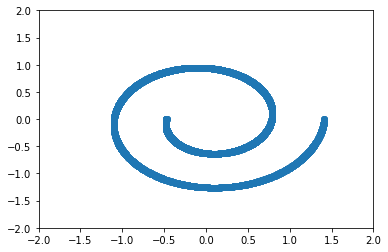

In [44]:
plt.scatter(data[:,0], data[:,1])
plt.xlim([-2,2])
plt.ylim([-2,2])

# 1. Define Forward Process

In [45]:
def forward_process(data, T, betas):
    for t in range(T):
        beta_t = betas[t]
        mu = data * np.sqrt(1-beta_t)
        std = np.sqrt(beta_t)
        # Sample from q(x_t |x_{t-1})
        # Sample from Gaussian Distribution with a known mean and an unknown standard deviation.
        data = mu + np.random.randn(data.shape[0],data.shape[1]) * std # data ~ N(mu, std)
    return data

In [59]:
T = 4
betas = np.linspace(1e-4, 1e-2, T)
xT = forward_process(data, T, betas)

In [60]:
print(xT.mean(0))
print(xT.std(0))

[ 0.02820596 -0.19420257]
[0.6982148  0.67167526]


(-2.0, 2.0)

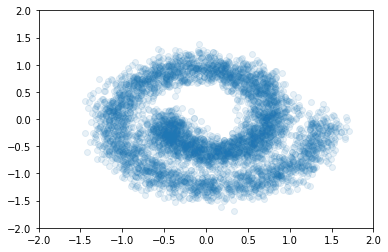

In [61]:
plt.scatter(xT[:,0], xT[:,1], alpha=0.1)
plt.xlim([-2,2])
plt.ylim([-2,2])

In [57]:
T = 40
betas = np.linspace(1e-4, 1e-2, T)
xT = forward_process(data, T, betas)

(-2.0, 2.0)

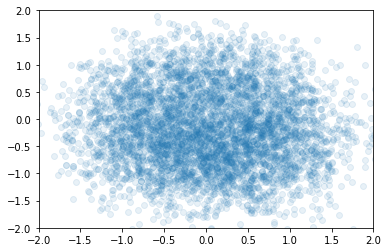

In [58]:
plt.scatter(xT[:,0], xT[:,1], alpha=0.1)
plt.xlim([-2,2])
plt.ylim([-2,2])

# 2. Forward Process with typical betas

In [49]:
def forward_process_torch(data, T, betas):
    for t in range(T):
        beta_t = betas[t]
        mu = data * torch.sqrt(1-beta_t)
        std = torch.sqrt(beta_t)
        data = mu + torch.randn_like(data) * std # data ~ N(mu, std)
    return data

In [50]:
T = 40
betas = torch.sigmoid(torch.linspace(-18,10, T)) * (3e-1 - 1e-5) + 1e-5 # scaling ??
xT = forward_process_torch(torch.from_numpy(data), T, betas)

In [51]:
print(xT.mean(0))
print(xT.std(0))

tensor([-0.0022, -0.0371], dtype=torch.float64)
tensor([0.9852, 1.0086], dtype=torch.float64)


(-4.0, 4.0)

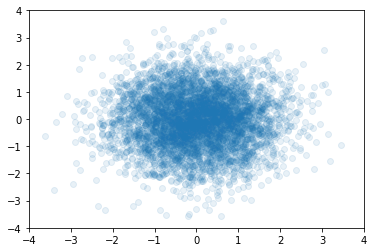

In [52]:
plt.scatter(xT[:,0], xT[:,1], alpha=0.1)
plt.xlim([-4,4])
plt.ylim([-4,4])